
### Libraries Installation


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib for figures, inline >> print more beautifully figures

### Read Data and Data exploration
First column of the data is considered as predictor which is time.

Second column is set to the target which is the pitch angle.

In [ ]:
#Load data
Data = np.loadtxt('case3.txt', delimiter=',')
t = Data[:,0]
pitchAngle = Data[:,1]

In [ ]:
#Data exploration
df = pd.DataFrame(Data, columns = ['time','pitch angle'])
df

,time,pitch angle
0,0.000005,2.6901
1,0.000010,9.1730
2,0.000015,-11.2890
3,0.000020,4.3181
4,0.000025,1.6028
...,...,...
199995,0.999980,367.7200
199996,0.999990,361.2100
199997,0.999990,357.6100
199998,1.000000,357.6000


### Data Visualization 


Data Visualization
Before filtering:



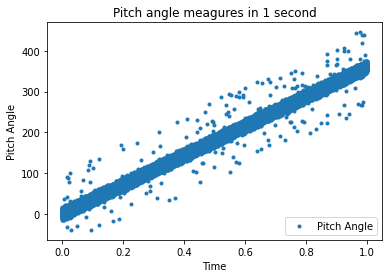

In [ ]:
print('Data Visualization')
print('Before filtering:\n')
plt.scatter(t, pitchAngle, marker='.', label="Pitch Angle")
plt.title('Pitch angle meagures in 1 second')
plt.xlabel('Time')
plt.ylabel('Pitch Angle')
plt.legend(loc="lower right")
plt.show()

### Kalman Filter
#### Derivation of Equations : 

Kalman coeiffient is calculated via the below equation : 

\begin{equation}
K_{k+1} = \frac{Ee^{2}_{k} + \sigma^{2}_\xi}{Ee^{2}_{k} + \sigma^{2}_\xi + \sigma^{2}_\eta}\quad {(1)}
\end{equation}

Equation for the mean square error : 

\begin{equation}
E(e^{2}_{k+1}) = \frac{\sigma^{2}_\eta(Ee^{2}_{k} + \sigma^{2}_\xi)}{Ee^{2}_{k} + \sigma^{2}_\xi + \sigma^{2}_\eta}\quad {(2)}
\end{equation}

where $\mathbf{\eta}$ is sensor error (eta), $\mathbf{\xi}$ is the model error (Xi), $\mathbf{\sigma}$ is the variance, and e is the error of estimation. 

\begin{equation}
Var(e) = E(e^{2})-[E(e)]^{2}
\end{equation}

since that the e is not a random variable, and variance of constant value is zero, this leads to : 

\begin{equation}
E(e^{2})= [E(e)]^{2}
\end{equation}

substitute in (2) : 
\begin{equation}
E(e) = \sqrt{\frac{\sigma^{2}_\eta(Ee^{2}_{k} + \sigma^{2}_\xi)}{Ee^{2}_{k} + \sigma^{2}_\xi + \sigma^{2}_\eta}}\quad {(3)}
\end{equation}

from equation (1) and (2) : 
\begin{equation}
K_{k+1} = \frac{E(e^{2}_{k+1})}{ \sigma^{2}_\eta}\quad {(4)}
\end{equation}

The equation for optimal fitered value is : 

\begin{equation}
X^{opt}_{k+1} = K_{k+1}.Z_{k+1}+(1-K_{k+1}).(X^{opt}_{k})\quad {(5)}
\end{equation}
<br><br>
Applying equations (3), (4), (5) for the range of the dataset to obtain the filtered data. 
<br><br>
**Initial Conditions :**

Z is assigned to pitch angles measured data.

let the first value of  = $Z[0]$

$E(e)$ at k = 0 is a square root of the error dispersion (variance) $\sigma_{\eta}$

$\sigma_{\eta}$ = 15

$\sigma_{\xi}$ = 1


After filtering:



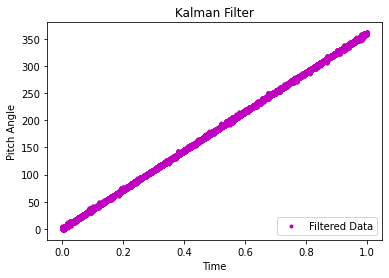

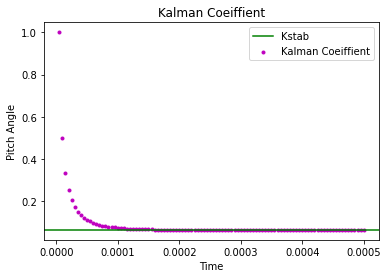

Kalman Coeiffient Stab : 0.06448147119912738


In [ ]:
print('After filtering:\n')
N = len(Data)
Xopt = np.zeros(N,)
Z = np.zeros(N,)
Eerror = np.zeros(N,)
K = np.ones(N,)
Z = pitchAngle
Xopt[0] = Z[0]
sigmaEta = 15
sigmaXi = 1
Eerror[0] = sigmaEta 

for i in range(N-1):
  Eerror[i+1] = np.sqrt(((sigmaEta**2)*(Eerror[i]**2+(sigmaXi**2)))/((Eerror[i]**2)+(sigmaXi**2)+(sigmaEta**2)))
  K[i+1] = (Eerror[i+1]**2)/(sigmaEta**2)
  Xopt[i+1] = K[i+1]*Z[i+1] + (1-K[i+1])*Xopt[i]

plt.scatter(t, Xopt, marker='.', label="Filtered Data", c= 'm')
plt.title('Kalman Filter')
plt.xlabel('Time')
plt.ylabel('Pitch Angle')
plt.legend(loc="lower right")
plt.show()

plt.scatter(t[0:100], K[0:100], marker='.', label="Kalman Coeiffient", c= 'm')
plt.axhline(y=K[-1], color='g', linestyle='-', label="Kstab")
plt.title('Kalman Coeiffient')
plt.xlabel('Time')
plt.ylabel('Pitch Angle')
plt.legend(loc="upper right")
plt.show()
print(f'Kalman Coeiffient Stab : {K[-1]}')


### Discussion

As $\sigma_{\eta}$ increases, Kalman coeiffient stablizes at lower values near to zero, which means that our estimation would not be totally affected by sensor noisy data. 

This means that sensor data is inherited with high noise, so in order to have a well-flitered data, it is better to assume that $\sigma_{\eta}$ is high because sensor noise is high. 

As K decreases, the model would depend more on previous $X^{opt}$ (optimal filtered value).

In below sections, a comparison between original data and filtered data is conducted , and figured out by plotting both original and filtered data vs time. 



### Comparison between original sensor data and filtered data using Kalman Filter

In [ ]:
print(f'Filtered Data at Kstab = {K[-1]} in comparsion to the original sensor data:\n')
eval_df = pd.DataFrame({'Sensor Data': pitchAngle, 'Filtered Data': Xopt})
eval_df

Filtered Data at Kstab = 0.06448147119912738 in comparsion to the original sensor data:



,Sensor Data,Filtered Data
0,2.6901,2.690100
1,9.1730,5.938737
2,-11.2890,0.153796
3,4.3181,1.210960
4,1.6028,1.291397
...,...,...
199995,367.7200,360.503618
199996,361.2100,360.549166
199997,357.6100,360.359645
199998,357.6000,360.181699


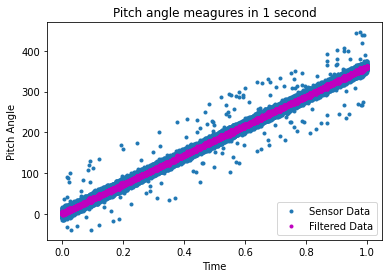

In [ ]:
plt.scatter(t, pitchAngle, marker='.', label="Sensor Data")
plt.scatter(t, Xopt, marker='.', label="Filtered Data", c= 'm')
plt.title('Pitch angle meagures in 1 second')
plt.xlabel('Time')
plt.ylabel('Pitch Angle')
plt.legend(loc="lower right")
plt.show()

### g-h Filter

Another filter is applied which is g-h filter in order to analyze the results.
since there is no physical model, only sensor model, this lead us to assume that Kalman filter coeiffient is constant. We saw that with increasing of the
step the Kalman coefficient always stabilizes to the certain value . So instead of guessing the values of the coefficients and and computing the Kalman coefficient by difficult formulas, we can assume that this coefficient is constant and select just this constant. *

Below Kstab is assumed to various values, and we come to a result that as Kstab decreases, the filter performs better and provides smoothed unnoisy data. 

The best fit is at Kstab = 0.1



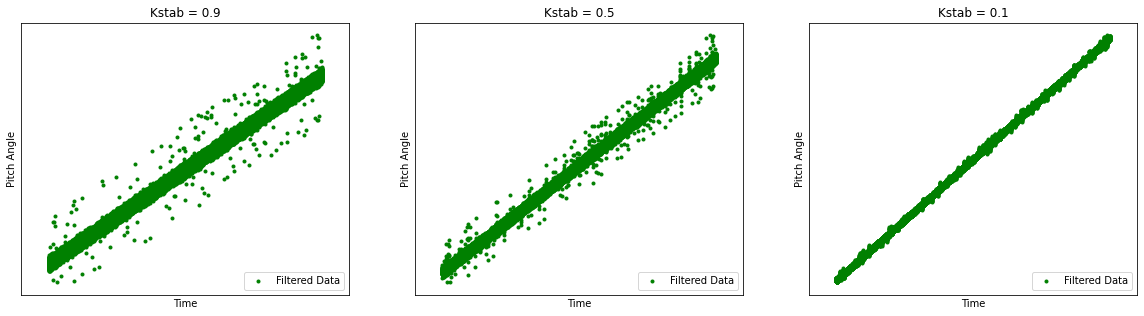

In [ ]:
Kstab_values = [0.9, 0.5, 0.1]
plt.figure(figsize=(20, 5))
for j in range(len(Kstab_values)):
    ax = plt.subplot(1, len(Kstab_values), j + 1)
    plt.setp(ax, xticks=(), yticks=())
    filtered_data = []
    Xopt = 0
    Kstab = Kstab_values[j]
    for i in range(len(Data)):
      Xk = pitchAngle[i]
      new_Zk = Xk
      new_Xopt = Kstab * new_Zk + (1-Kstab)*Xopt
      filtered_data.append(new_Xopt)
      Xopt = new_Xopt

    plt.scatter(t, filtered_data, marker='.', label="Filtered Data", c= 'g')
    plt.title(f'Kstab = {Kstab}')
    plt.xlabel('Time')
    plt.ylabel('Pitch Angle')
    plt.legend(loc="lower right")
    plt.xlim([-0.1, 1.1])
plt.show()

### References 
*https://david.wf/kalmanfilter/